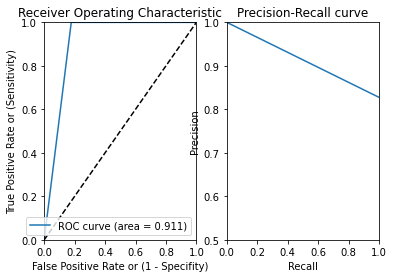

<Figure size 720x720 with 0 Axes>

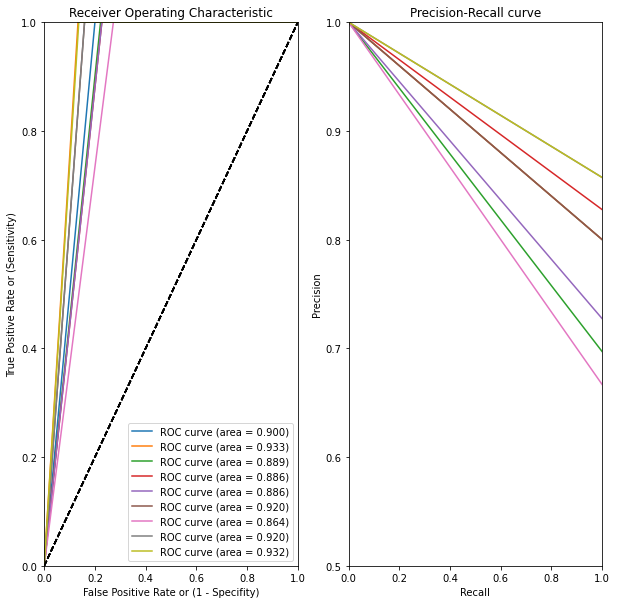

In [29]:
import numpy as np
import pandas as pd
import scipy.io as sp
from sklearn.model_selection import StratifiedKFold 
from sklearn.mixture import GaussianMixture
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve



dataSet = sp.loadmat('C:\\Users\\junda\\OneDrive\\Bureau\\breastw.mat')
X = dataSet['X']
y = dataSet['y']
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y)

skf = StratifiedKFold(n_splits=10,shuffle=True)

for train_index, test_index in skf.split(X,y):
    
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    gmm = GaussianMixture(n_components=2, covariance_type ='full', random_state = 0, max_iter=100)
    gmm.fit(X_train,y_train)
    y_pred = gmm.predict(X_test)
    probas = gmm.predict_proba(X_test)
    if precision_score(y_test,y_pred)< 0.15:
    
        y_pred = np.array([0 if label == 1 else 1 for label in y_pred])
        probas = 1-gmm.predict_proba(X_test)
        probas = probas[:, 1]
    else :
        probas = gmm.predict_proba(X_test)
        probas = probas[:, 1]
    

    fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.subplot(1,2,1)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
   

    precision, recall, thresholds = precision_recall_curve(y_test,probas)


    plt.subplot(1,2,2)
    plt.plot(recall, precision,label='ROC curve (area = %0.3f)' % roc_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.50, 1.0])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    
    plt.figure('Receiver Operating Characteristic',(10,10))
    plt.figure('Precision-Recall curve',(10,10))
    